# Tutorial 9.1: Principal Components Analysis of Firing-Rate Trajectories
### Neuroscience goals:
- use PCA to reduce the noise in a dataset
### Computational goals:
- rebuild arrays after the projection of data onto a subset of axes

### Overview
- will generate firing rate trajectories of fifty neurons
- each neurons firing rate is produced by a weighted combination of two input signals, mixed in with a lot of noise
- will use PCA to produce less noisy firing rates for each cell (denoising) and to extract input signals from noisy set of firing rates

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 1.a.
- define two vectors to represent time-dependent oscillating inputs, $I_A$ and $I_B$, such that $I_A = A\sin(2\pi ft)$ and $I_B = B\cos(2\pi ft)$, with frequency $f$ = 0.5Hz, and amplitudes A=20 and B=10. duration of 10s and timesteps of 1ms

In [242]:
freq = 0.5
amp_a = 20
amp_b = 10
dt = 1e-3
tmax = 10
t = np.arange(0, tmax, dt)
n_neurons = 50
sigma = 10

i_a = amp_a * np.sin(2 * np.pi * freq * t)
i_b = amp_b * np.cos(2 * np.pi * freq * t)
i_0 = 50

### 1b.
- set up a matrix to contain the firing rates of fifty neurons across this timespan
- generate the firing rate of each neuron as a column in the matrix, with each row representing a separate time point
- time dependent firing rate of a neuron, i, is given by:
$$
r_i (t) = 100 + W_i^{(0)}I_0 + W_i^{(A)}I_A + W_i^{(B)}I_B + \sigma \cdot \eta_i (t)
$$

where $I_0$ = 50, the static weights are each independent numbers selected separately, once for each neuron, from the normal distribution with unit standard deviation and zero mean
- $\sigma$ = 10 scales the noise, and $\eta_i (t)$ is a series of normally distributed random variables, N(0, 1), selected independently at each time point for each neuron

In [243]:
firing_rates = np.zeros((len(t), n_neurons))
w0 = np.random.normal(size=n_neurons)
wa = np.random.normal(size=n_neurons)
wb = np.random.normal(size=n_neurons)


In [244]:
for i in range(n_neurons):
    eta = np.random.normal(0, 1, len(t))
    firing_rates[:, i] = 100 + w0[i] * i_0 + wa[i] * i_a + wb[i] + i_b + sigma * eta

### 1c. run PCA on the rate matrix


In [245]:
# fit data
pca = PCA().fit(firing_rates)
score = pca.transform(firing_rates)
pc1 = pca.components_[0]
pc2 = pca.components_[1]
latent = pca.explained_variance_
explained = pca.explained_variance_ratio_ * 100
mu = np.mean(firing_rates)

### 1d. plot
- first PC against the vector of input weights, $W_i^{(A)}$
- second PC against the vector of input weights, $W_i^{(B)}$

Text(0.5, 1.0, 'PCs explained by variance ratio')

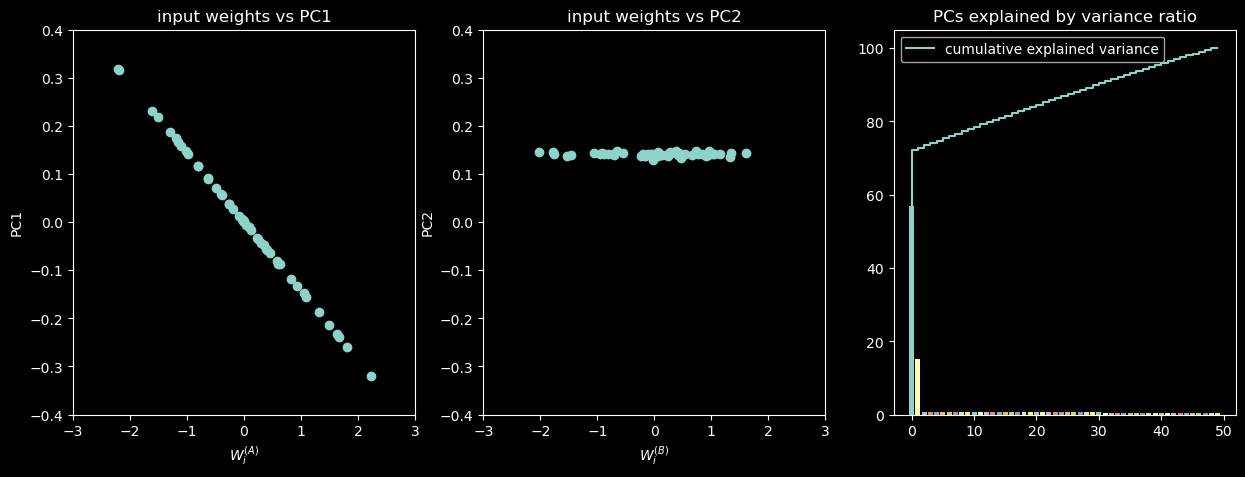

In [246]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('input weights vs PC1')
ax[0].scatter(wa, pc1)
ax[0].set_xlabel('$W_i^{(A)}$')
ax[0].set_ylabel('PC1')
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-0.4, 0.4)

ax[1].set_title('input weights vs PC2')
ax[1].scatter(wb, pc2)
ax[1].set_xlabel('$W_i^{(B)}$')
ax[1].set_ylabel('PC2')
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.4, 0.4)

for i in range(50):
    ax[2].bar(i, explained[i])
ax[2].step(range(50), np.cumsum(explained), label='cumulative explained variance')
ax[2].legend(loc='best')
ax[2].set_title('PCs explained by variance ratio')

### 1f. denoising
- produce a new matrix of firing rates by multiplying the first two columns of score by the first two PCs
- add to all entries of each column produced in this manner the value of the corresponding entry of mu
- are assuming that in the new coordinate space, any changes in rates on PC3+ correspond to noise that can be ignored
- are recreating the firing rates of the original neurons using just the projection of each neuron's firing rate on the axes of the first two PCs

In [247]:
new_rate = np.dot(score[:, :2], pca.components_[:2, :]) + pca.mean_

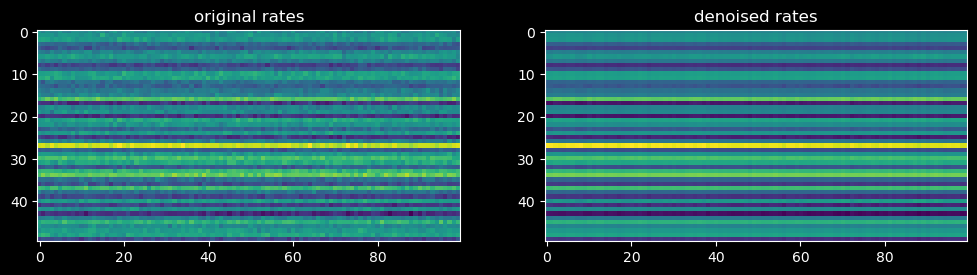

In [248]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].set_title('original rates')
ax[1].set_title('denoised rates')
ax[0].imshow(firing_rates[:100, :].T)
ax[1].imshow(new_rate[:100, :].T)

### 1g
- compare the behavior of the denoised data with original data
- plot original rates of two neurons as a function of time, then the corresponding columns of the new matrix to reveal denoised rates as a function of time

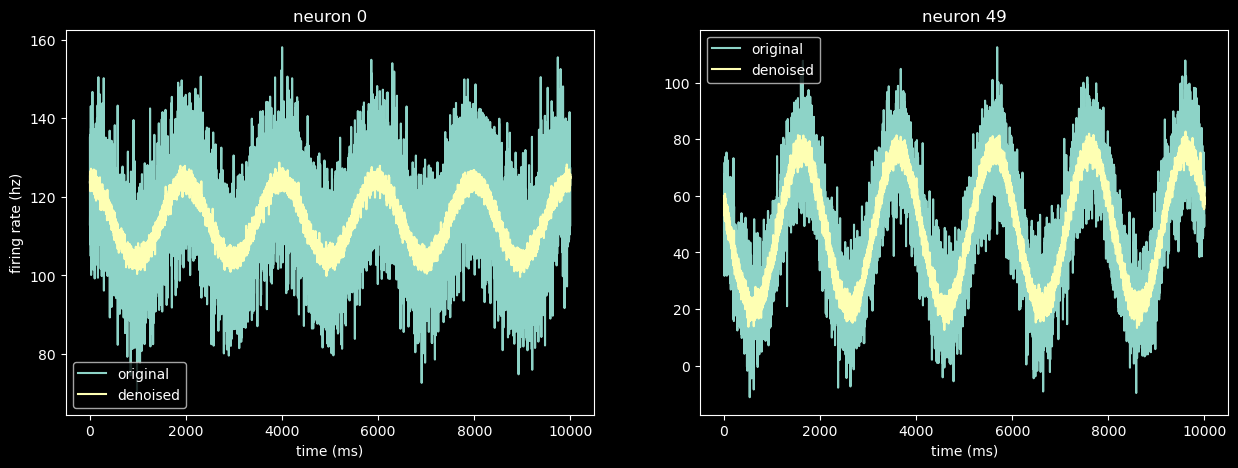

In [249]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('neuron 0')
ax[0].plot(firing_rates[:, 0], label='original')
ax[0].plot(new_rate[:, 0], label='denoised')
ax[0].set_ylabel('firing rate (hz)')
ax[0].set_xlabel('time (ms)')
ax[0].legend(loc='lower left')

ax[1].set_title('neuron 49')
ax[1].plot(firing_rates[:, 49], label='original')
ax[1].plot(new_rate[:, 49], label='denoised')
ax[1].set_xlabel('time (ms)')

plt.legend()

### 1h
- plot two neurons against each other, using original and denoised rates in separate subplots

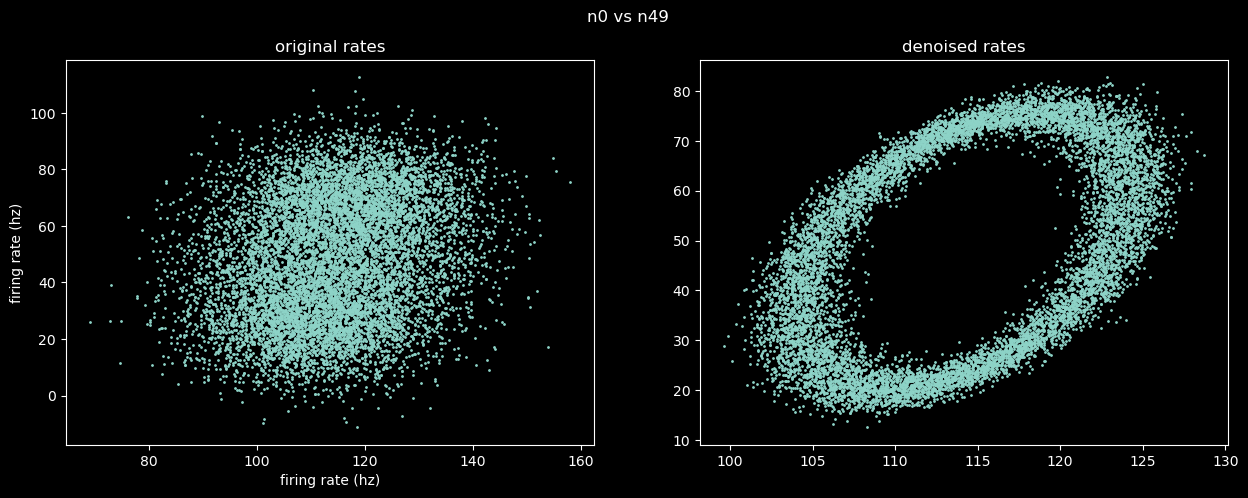

In [250]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('n0 vs n49')
ax[0].set_title('original rates')
ax[0].scatter(firing_rates[:, 0], firing_rates[:, 49], s=1)
ax[0].set_ylabel('firing rate (hz)')
ax[0].set_xlabel('firing rate (hz)')

ax[1].set_title('denoised rates')
ax[1].scatter(new_rate[:, 0], new_rate[:, 49], s=1)

### 1i
- plot first and second columns of `score` to show time dependence of systems's first and second PCs

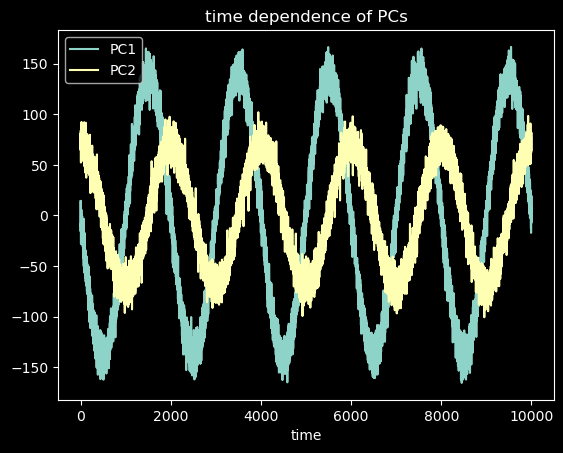

In [251]:
plt.plot(score[:, 0], label='PC1')
plt.plot(score[:, 1], label='PC2')
plt.title('time dependence of PCs')
plt.xlabel('time')
plt.legend()

### 2
- repeat q1 with:

In [252]:
# initialize inputs
i_a = amp_a * np.sin(2 * np.pi * 1 * t)
i_b = amp_b * np.cos(2 * np.pi * 0.5 * t)
# initialize firing rates
firing_rates = np.zeros((len(t), n_neurons))
w0 = np.random.normal(size=n_neurons)
wa = np.random.normal(size=n_neurons)
wb = np.random.normal(size=n_neurons)
# update firing rates
for i in range(n_neurons):
    eta = np.random.normal(0, 1, len(t))
    firing_rates[:, i] = 100 + w0[i] * i_0 + wa[i] * i_a + wb[i] + i_b + sigma * eta

# run PCA
pca = PCA().fit(firing_rates)
score = pca.transform(firing_rates)
pc1 = pca.components_[0]
pc2 = pca.components_[1]
latent = pca.explained_variance_
explained = pca.explained_variance_ratio_ * 100
mu = np.mean(firing_rates)

Text(0.5, 1.0, 'PCs explained by variance ratio')

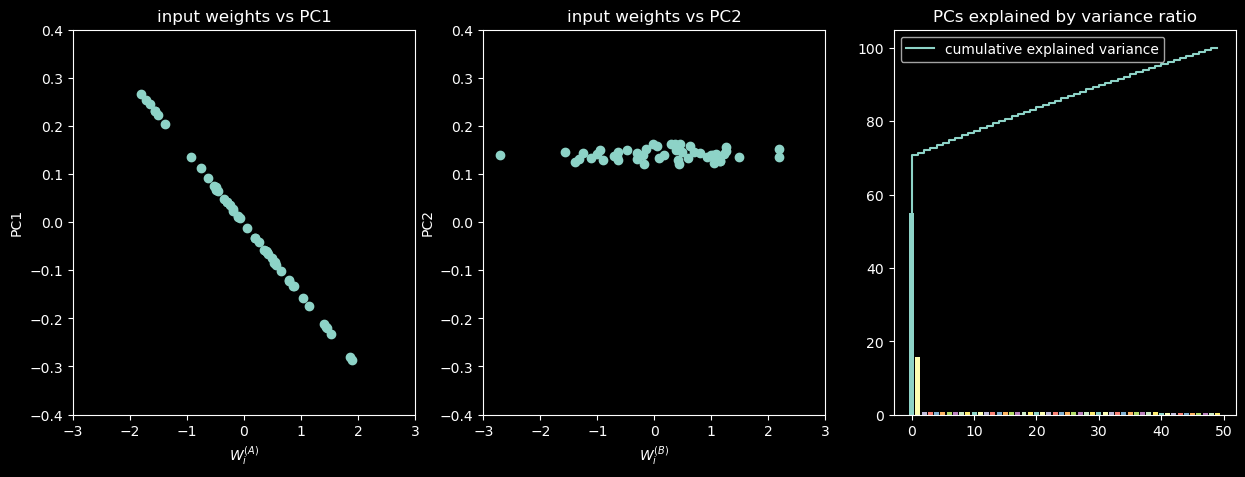

In [253]:
# plot PC against weight vectors
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('input weights vs PC1')
ax[0].scatter(wa, pc1)
ax[0].set_xlabel('$W_i^{(A)}$')
ax[0].set_ylabel('PC1')
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-0.4, 0.4)

ax[1].set_title('input weights vs PC2')
ax[1].scatter(wb, pc2)
ax[1].set_xlabel('$W_i^{(B)}$')
ax[1].set_ylabel('PC2')
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.4, 0.4)

for i in range(50):
    ax[2].bar(i, explained[i])
ax[2].step(range(50), np.cumsum(explained), label='cumulative explained variance')
ax[2].legend(loc='best')
ax[2].set_title('PCs explained by variance ratio')

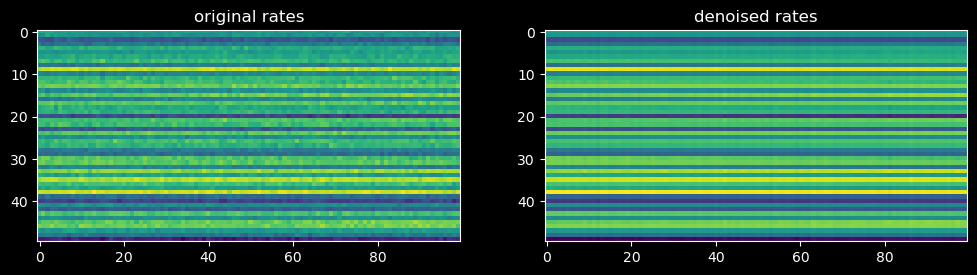

In [254]:
# denoise
new_rate = np.dot(score[:, :2], pca.components_[:2, :]) + pca.mean_

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].set_title('original rates')
ax[1].set_title('denoised rates')
ax[0].imshow(firing_rates[:100, :].T)
ax[1].imshow(new_rate[:100, :].T)

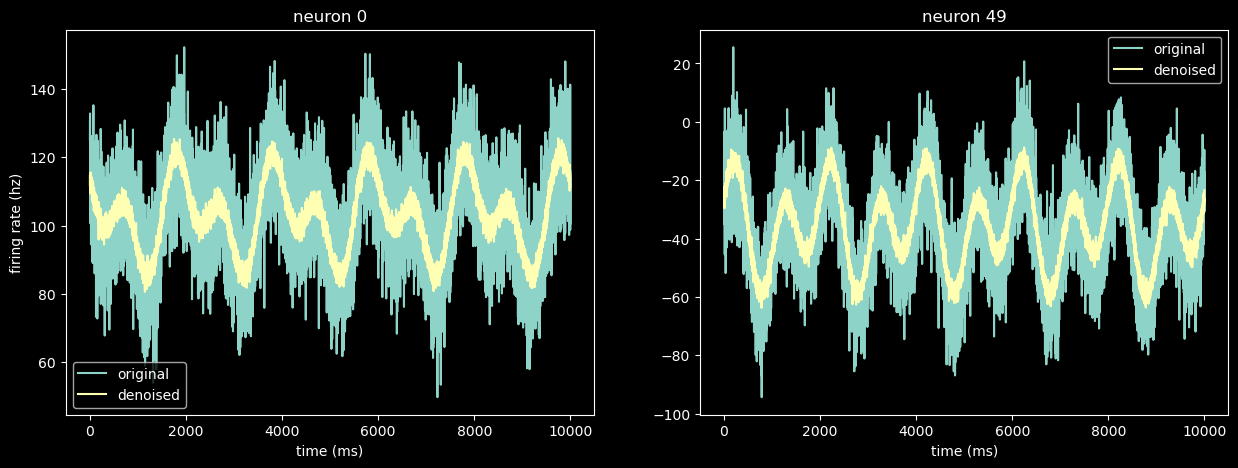

In [255]:
# compare denoised to original
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('neuron 0')
ax[0].plot(firing_rates[:, 0], label='original')
ax[0].plot(new_rate[:, 0], label='denoised')
ax[0].set_ylabel('firing rate (hz)')
ax[0].set_xlabel('time (ms)')
ax[0].legend(loc='lower left')

ax[1].set_title('neuron 49')
ax[1].plot(firing_rates[:, 49], label='original')
ax[1].plot(new_rate[:, 49], label='denoised')
ax[1].set_xlabel('time (ms)')

plt.legend()

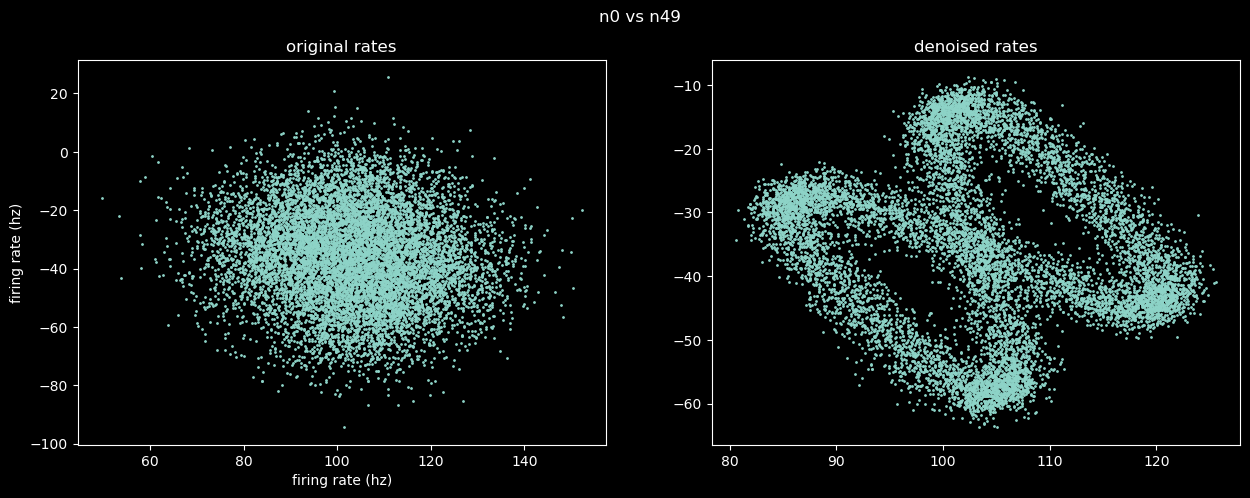

In [256]:
# compare neuron firing rates to each other
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('n0 vs n49')
ax[0].set_title('original rates')
ax[0].scatter(firing_rates[:, 0], firing_rates[:, 49], s=1)
ax[0].set_ylabel('firing rate (hz)')
ax[0].set_xlabel('firing rate (hz)')

ax[1].set_title('denoised rates')
ax[1].scatter(new_rate[:, 0], new_rate[:, 49], s=1)

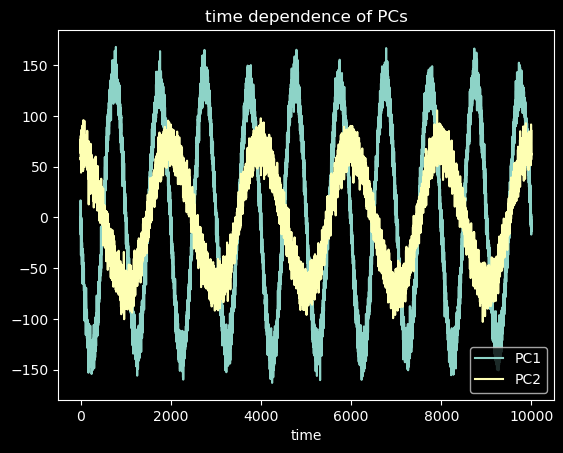

In [257]:
plt.plot(score[:, 0], label='PC1')
plt.plot(score[:, 1], label='PC2')
plt.title('time dependence of PCs')
plt.xlabel('time')
plt.legend()

### 3
repeat q1 with slowly ramping current i_a and transient current i_b:

In [258]:
i_a = amp_a * t
i_b = np.zeros_like(t)
i_b[4000:5000] = amp_b * np.sin(2 * np.pi * freq * t[4000:5000])

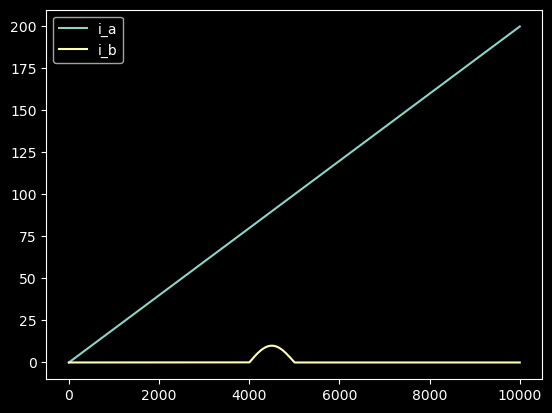

In [259]:
plt.plot(i_a, label='i_a')
plt.plot(i_b, label='i_b')
plt.legend()

In [260]:
# initialize firing rates
firing_rates = np.zeros((len(t), n_neurons))
w0 = np.random.normal(size=n_neurons)
wa = np.random.normal(size=n_neurons)
wb = np.random.normal(size=n_neurons)
# update firing rates
for i in range(n_neurons):
    eta = np.random.normal(0, 1, len(t))
    firing_rates[:, i] = 100 + w0[i] * i_0 + wa[i] * i_a + wb[i] + i_b + sigma * eta

# run PCA
pca = PCA().fit(firing_rates)
score = pca.transform(firing_rates)
pc1 = pca.components_[0]
pc2 = pca.components_[1]
latent = pca.explained_variance_
explained = pca.explained_variance_ratio_ * 100
mu = np.mean(firing_rates)

Text(0.5, 1.0, 'PCs explained by variance ratio')

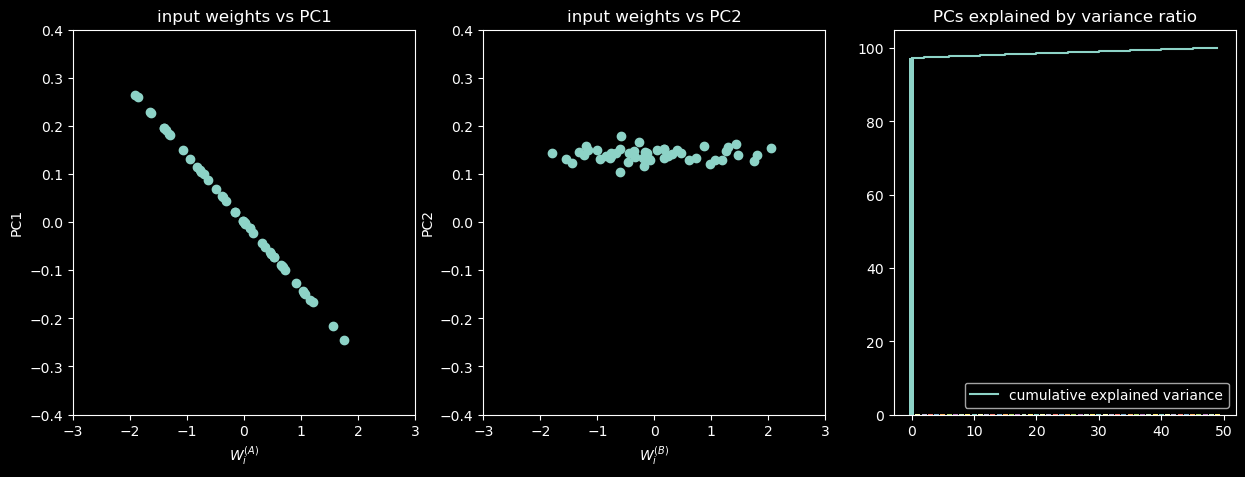

In [261]:
# plot PC against weight vectors
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('input weights vs PC1')
ax[0].scatter(wa, pc1)
ax[0].set_xlabel('$W_i^{(A)}$')
ax[0].set_ylabel('PC1')
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-0.4, 0.4)

ax[1].set_title('input weights vs PC2')
ax[1].scatter(wb, pc2)
ax[1].set_xlabel('$W_i^{(B)}$')
ax[1].set_ylabel('PC2')
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.4, 0.4)

for i in range(50):
    ax[2].bar(i, explained[i])
ax[2].step(range(50), np.cumsum(explained), label='cumulative explained variance')
ax[2].legend(loc='best')
ax[2].set_title('PCs explained by variance ratio')

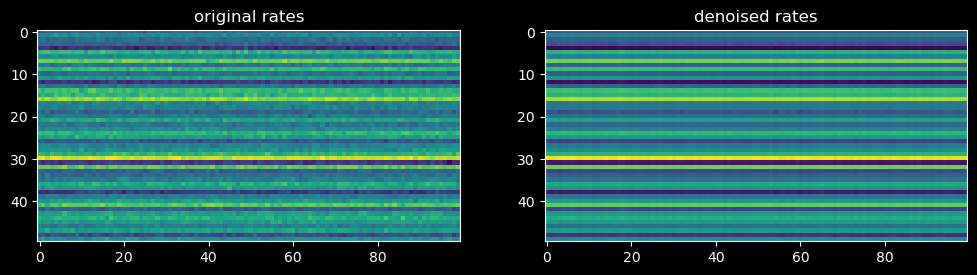

In [262]:
# denoise
new_rate = np.dot(score[:, :2], pca.components_[:2, :]) + pca.mean_

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].set_title('original rates')
ax[1].set_title('denoised rates')
ax[0].imshow(firing_rates[:100, :].T)
ax[1].imshow(new_rate[:100, :].T)

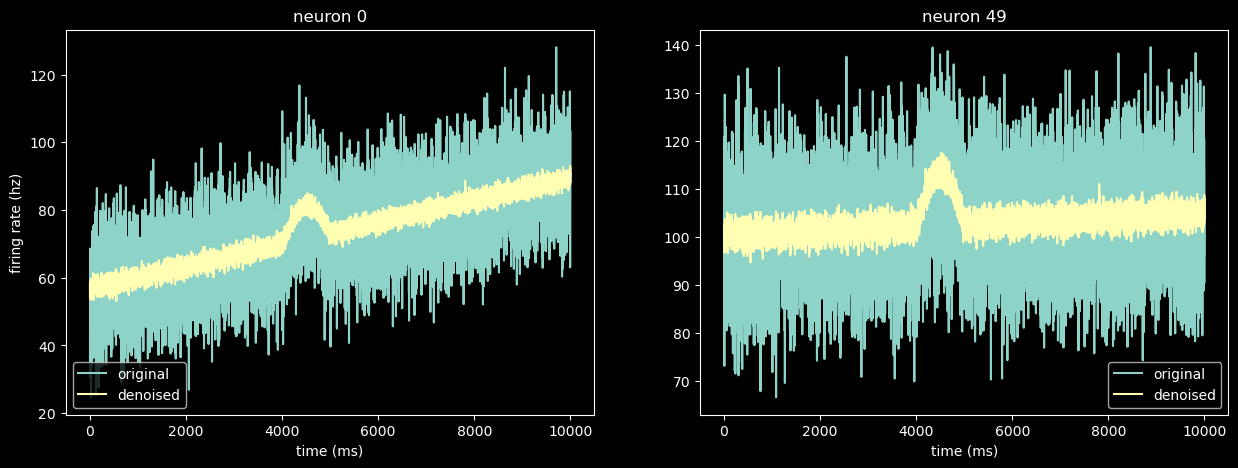

In [263]:
# compare denoised to original
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('neuron 0')
ax[0].plot(firing_rates[:, 0], label='original')
ax[0].plot(new_rate[:, 0], label='denoised')
ax[0].set_ylabel('firing rate (hz)')
ax[0].set_xlabel('time (ms)')
ax[0].legend(loc='lower left')

ax[1].set_title('neuron 49')
ax[1].plot(firing_rates[:, 49], label='original')
ax[1].plot(new_rate[:, 49], label='denoised')
ax[1].set_xlabel('time (ms)')

plt.legend()

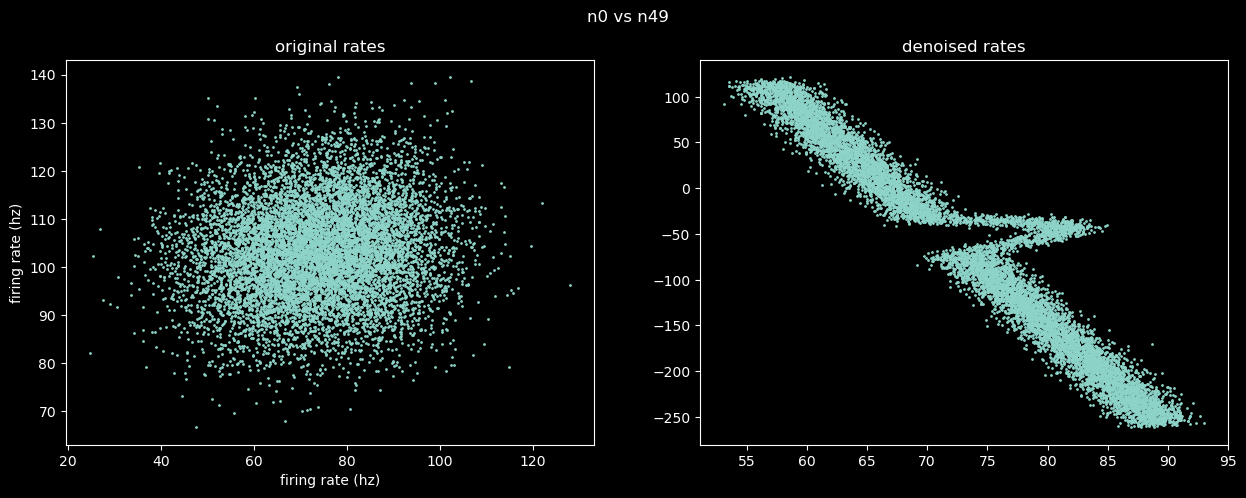

In [264]:
# compare neuron firing rates to each other
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('n0 vs n49')
ax[0].set_title('original rates')
ax[0].scatter(firing_rates[:, 0], firing_rates[:, 49], s=1)
ax[0].set_ylabel('firing rate (hz)')
ax[0].set_xlabel('firing rate (hz)')

ax[1].set_title('denoised rates')
ax[1].scatter(new_rate[:, 0], new_rate[:, 40], s=1)

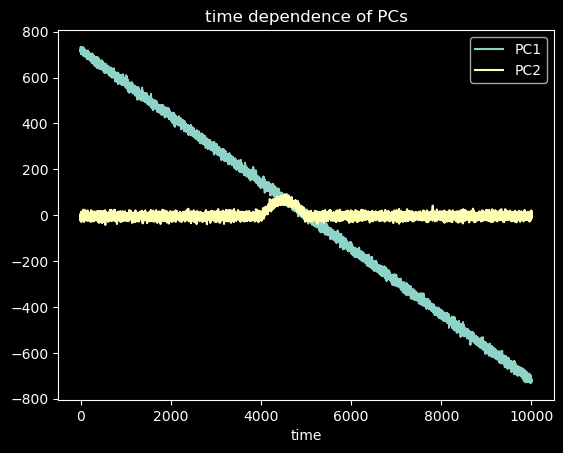

In [265]:
plt.plot(score[:, 0], label='PC1')
plt.plot(score[:, 1], label='PC2')
plt.title('time dependence of PCs')
plt.xlabel('time')
plt.legend()